## 导入需要用到的包

In [1]:
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor as XGBR
from sklearn.neighbors import KNeighborsRegressor as KNR
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score,cross_val_predict
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from mpl_toolkits.mplot3d import Axes3D 
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import log_loss
from sklearn.decomposition import PCA
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import numpy as np
import pandas as pd
import os

d:\ANACONDA\lib\site-packages\pkg_resources\__init__.py:125: PkgResourcesDeprecationWarning: -PKG-VERSION is an invalid version and will not be supported in a future release
  PkgResourcesDeprecationWarning,


## 数据读取

#### logP

In [2]:
X_ = pd.read_excel('./S1.xlsx', sheet_name='S1',index_col=0).iloc[:,:]
logP = pd.read_excel('./S1.xlsx', sheet_name='logP')
Y = logP.iloc[:,1]
X = X_.loc[logP.iloc[:,0],:]
display(X)

,SSSS,SSSC,SSSN,SSSO,SSSX,SSSM,SSCC,SSCN,SSCO,SSCX,...,OOMM,OXXX,OXXM,OXMM,OMMM,XXXX,XXXM,XXMM,XMMM,MMMM
GNP1,1.238,75.632,0.0,0.000,0,23.644,346.066,0.000,0.446,0,...,0.000,0.0,0,0,0.000,0.0,0,0,0,848.400
GNP2,0.826,60.608,0.0,0.000,0,38.961,308.615,0.000,0.000,0,...,0.000,0.0,0,0,0.000,0.0,0,0,0,900.806
GNP3,0.310,33.854,0.0,0.000,0,24.158,167.851,0.000,0.223,0,...,0.000,0.0,0,0,0.000,0.0,0,0,0,990.079
GNP4,0.826,32.619,0.0,0.000,0,23.541,169.697,0.000,0.335,0,...,0.000,0.0,0,0,0.000,0.0,0,0,0,976.673
GNP5,0.722,72.751,0.0,0.000,0,51.605,347.503,0.000,0.446,0,...,0.000,0.0,0,0,0.000,0.0,0,0,0,859.978
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PdNP8,2.683,86.333,0.0,0.000,0,121.070,991.503,0.860,5.575,0,...,3.610,0.0,0,0,68.373,0.0,0,0,0,11690.278
PdNP9,0.310,33.751,0.0,0.000,0,41.748,655.560,0.645,1.115,0,...,0.113,0.0,0,0,16.867,0.0,0,0,0,13639.079
PdNP10,0.206,20.168,0.0,0.000,0,31.211,532.932,0.000,3.568,0,...,10.039,0.0,0,0,90.159,0.0,0,0,0,15283.729
PdNP11,1.858,82.217,0.0,0.000,0,118.486,942.060,0.645,4.014,0,...,4.399,0.0,0,0,75.903,0.0,0,0,0,11789.066


#### celluptake1

In [11]:
X_ = pd.read_excel('./S1.xlsx', sheet_name='S1',index_col=0).iloc[:,:]
logP = pd.read_excel('./S1.xlsx', sheet_name='celluptake1')
Y = logP.iloc[:,1]
X = X_.loc[logP.iloc[:,0],:]
display(X)

,SSSS,SSSC,SSSN,SSSO,SSSX,SSSM,SSCC,SSCN,SSCO,SSCX,...,OOMM,OXXX,OXXM,OXMM,OMMM,XXXX,XXXM,XXMM,XMMM,MMMM
GNP123,0.103,11.113,0.0,0.0,0,12.747,106.908,0.000,0.446,0,...,0.12,0.0,0,0,2.876,0.0,0,0,0,850.025
GNP124,0.103,7.306,0.0,0.0,0,8.635,83.413,0.000,0.558,0,...,0.00,0.0,0,0,1.880,0.0,0,0,0,940.009
GNP125,0.206,7.923,0.0,0.0,0,8.430,93.775,0.645,0.223,0,...,0.00,0.0,0,0,3.207,0.0,0,0,0,1689.845
GNP126,0.206,9.570,0.0,0.0,0,10.280,113.269,0.645,0.892,0,...,0.12,0.0,0,0,2.986,0.0,0,0,0,1092.048
GNP127,1.135,16.052,0.0,0.0,0,17.990,134.814,0.860,1.672,0,...,0.12,0.0,0,0,3.318,0.0,0,0,0,1025.829
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GNP189,1.135,22.638,0.0,0.0,0,15.009,99.828,0.000,0.558,0,...,0.00,0.0,0,0,0.774,0.0,0,0,0,546.209
GNP190,0.516,19.860,0.0,0.0,0,13.364,99.110,0.000,0.669,0,...,0.12,0.0,0,0,1.106,0.0,0,0,0,532.798
GNP191,0.619,17.493,0.0,0.0,0,14.700,97.777,0.000,0.669,0,...,0.00,0.0,0,0,0.774,0.0,0,0,0,543.466
GNP192,1.032,18.831,0.0,0.0,0,13.878,101.573,0.000,0.223,0,...,0.00,0.0,0,0,1.548,0.0,0,0,0,561.043


## 预打分

In [12]:
Xtrain,Xtest,Ytrain,Ytest = train_test_split(X,Y,test_size=0.2,random_state=100)
rfc = RandomForestRegressor(random_state=60)
CV_score = cross_val_score(rfc, Xtrain, Ytrain, cv=5).mean()
regressor = rfc.fit(Xtrain, Ytrain)
score_test = regressor.score(Xtest,Ytest)
print("5cv:",CV_score,"TEST:",score_test)

5cv: 0.5459183778387693 TEST: 0.49836986039774034


### 设置train_test_split的随机数种子

In [13]:
# CV = 0
# test =0
for i in range(500):
    Xtrain,Xtest,Ytrain,Ytest = train_test_split(X,Y,test_size=0.2,random_state=i)
    rfc = RandomForestRegressor(random_state=60)
    CV_score = cross_val_score(rfc, Xtrain, Ytrain, cv=5).mean()
    regressor = rfc.fit(Xtrain, Ytrain)
    score_test = regressor.score(Xtest,Ytest)
#     if CV < CV_score and test < score_test:
#         CV = CV_score
#         test = score_test
    if CV_score>0.65 and score_test>0.65:
        print("5cv:",CV_score,"TEST:",score_test,"random_state:",i)

KeyboardInterrupt: 

### 选择分数较高的train_test_split中的random_state

In [14]:
# Xtrain,Xtest,Ytrain,Ytest = train_test_split(X,Y,test_size=0.2,random_state=205)# logP
Xtrain,Xtest,Ytrain,Ytest = train_test_split(X,Y,test_size=0.2,random_state=408)# celluptake1
rfc = RandomForestRegressor(random_state=60)
CV_score = cross_val_score(rfc, Xtrain, Ytrain, cv=5).mean()
regressor = rfc.fit(Xtrain, Ytrain)
score_test = regressor.score(Xtest,Ytest)
print("5cv:",CV_score,"TEST:",score_test)

5cv: 0.7003585055059486 TEST: 0.8194911945473654


### 划分数据集后对应粒径
#### （不运行，之前已保存）

In [9]:
Xtrain.index

Index(['GNP24', 'PdNP7', 'PdNP8', 'GNP144', 'GNP96', 'GNP18', 'GNP157',
       'GNP64', 'GNP32', 'GNP133',
       ...
       'GNP161', 'GNP145', 'GNP71', 'GNP26', 'GNP22', 'GNP17', 'GNP148',
       'GNP137', 'GNP146', 'GNP39'],
      dtype='object', length=117)

In [11]:
logP = pd.read_excel('./S1.xlsx', sheet_name='logP',index_col=0)
logP

,logP,Standard deviation (n = 3),Experimental protocol,Size
Index,,,,
GNP1,-0.6635,0.7,The experimental logP values of all the nanopa...,6.20
GNP2,-0.3728,0.4,NaN,6.20
GNP3,-0.3219,0.2,NaN,6.10
GNP4,0.0252,0.1,NaN,6.50
GNP5,1.0720,0.1,NaN,6.30
...,...,...,...,...
PdNP8,-0.8643,0.2,NaN,26.31
PdNP9,-0.6113,0.4,NaN,25.06
PdNP10,0.4681,0.2,NaN,26.76


In [12]:
size = logP.loc[Xtrain.index,:]
size

,logP,Standard deviation (n = 3),Experimental protocol,Size
GNP24,0.3600,­,NaN,3.63
PdNP7,-0.9405,0.4,NaN,26.02
PdNP8,-0.8643,0.2,NaN,26.31
GNP144,-0.9600,0.05,NaN,5.00
GNP96,1.9900,­,NaN,5.00
...,...,...,...,...
GNP17,0.4840,­,NaN,4.67
GNP148,2.3800,0.19,NaN,7.30
GNP137,-2.3000,0.16,NaN,5.80
GNP146,-2.2800,0.13,NaN,8.00


In [13]:
# pd.DataFrame(size).to_excel('./logP_size.xlsx')

## RF模型调参

In [15]:
score_5cv_all = []
for i in range(0, 200, 1):
    rfc =RandomForestRegressor(random_state=i)
    score_5cv =cross_val_score(rfc, Xtrain, Ytrain, cv=5).mean()
    score_5cv_all.append(score_5cv)
    pass

score_max_5cv = max(score_5cv_all)
random_state_5cv = range(0, 200)[score_5cv_all.index(max(score_5cv_all))]

print("Best_5cv score：{}".format(score_max_5cv),
      "random_5cv:{}".format(random_state_5cv))

score_5cv_all = []
for i in range(1, 400, 1):
    rfc = RandomForestRegressor(n_estimators=i
                                , random_state=random_state_5cv)
    score_5cv = cross_val_score(rfc, Xtrain, Ytrain, cv=5).mean()
    score_5cv_all.append(score_5cv)
    pass

score_max_5cv = max(score_5cv_all)
n_est_5cv = range(1,400)[score_5cv_all.index(score_max_5cv)]

print("Best_5cv score：{}".format(score_max_5cv),
      "n_est_5cv:{}".format(n_est_5cv))

score_5cv_all = []
for i in range(1, 300, 1):
    rfc = RandomForestRegressor(n_estimators=n_est_5cv
                                ,random_state=random_state_5cv
                                ,max_depth=i)
    score_5cv = cross_val_score(rfc, Xtrain, Ytrain, cv=5).mean()
    score_5cv_all.append(score_5cv)
    pass

score_max_5cv = max(score_5cv_all)
max_depth_5cv = range(1,300)[score_5cv_all.index(score_max_5cv)]

print("Best_5cv score：{}".format(score_max_5cv),
      "max_depth_5cv:{}".format(max_depth_5cv))

score_5cv_all = []
for i in range(1,X.shape[1]+1):
    rfc = RandomForestRegressor(n_estimators=n_est_5cv
                                ,random_state=random_state_5cv
                                ,max_depth=max_depth_5cv
                                ,max_features=i)
    score_5cv = cross_val_score(rfc, Xtrain, Ytrain, cv=5).mean()
    score_5cv_all.append(score_5cv)
    pass

score_max_5cv = max(score_5cv_all)
max_features_5cv = range(1,X.shape[1]+1)[score_5cv_all.index(score_max_5cv)]

print("Best_5cv score：{}".format(score_max_5cv),
      "max_features_5cv:{}".format(max_features_5cv))

Best_5cv score：0.7435612163073313 random_5cv:21
Best_5cv score：0.7596104883330123 n_est_5cv:51
Best_5cv score：0.7662762094428542 max_depth_5cv:8
Best_5cv score：0.7769272778092122 max_features_5cv:37


### 使用调整过后的参数

In [16]:
from sklearn.metrics import mean_absolute_error

rfc = RandomForestRegressor(random_state=21
                            ,n_estimators=51
                            ,max_depth=8
                            ,max_features=37
                           )

CV_score = cross_val_score(rfc, Xtrain, Ytrain, cv=5).mean()
CV_predictions = cross_val_predict(rfc, Xtrain, Ytrain, cv=5)
rmse_5cv = np.sqrt(mean_squared_error(Ytrain,CV_predictions))
mae_5cv = mean_absolute_error(Ytrain, CV_predictions)
print("r2_5cv:",CV_score,"rmse_5CV",rmse_5cv, "mae_5cv", mae_5cv)

regressor = rfc.fit(Xtrain, Ytrain)
test_predictions = regressor.predict(Xtest)
score_test = regressor.score(Xtest,Ytest)
rmse_test = np.sqrt(mean_squared_error(Ytest,test_predictions))
mae_test = mean_absolute_error(Ytest, test_predictions)
print("r2_test:",score_test,"rmse_test",rmse_test, "mae_test", mae_test)

expvspred_5cv = pd.DataFrame({'Exp_5cv': Ytrain, 'Pred_5cv':CV_predictions})
expvspred_test = pd.DataFrame({'Exp_test':Ytest,'Pred_test':test_predictions})

writer = pd.ExcelWriter('cytotoxicity_predict_RF.xlsx')
expvspred_5cv.to_excel(excel_writer=writer,sheet_name="5cv")
expvspred_test.to_excel(excel_writer=writer,sheet_name="test")
writer.save()


r2_5cv: 0.7769272778092122 rmse_5CV 2.9403577796816194 mae_5cv 2.129378360878225
r2_test: 0.7603613384006485 rmse_test 3.00004053145593 mae_test 2.1946960309891557


In [7]:
def result_figure(y_test_train, pred_train, y_test_test, pred_test, x_label, y_label, data_neme, model_name, path):
#     os.makedirs("{}/figure".format(path), exist_ok=True)
#     os.makedirs("{}/csv".format(path), exist_ok=True)
    
    r2_train = r2_score(y_test_train, pred_train)
    r2_test = r2_score(y_test_test, pred_test)

    mse_train = MSE(y_test_train, pred_train)
    mse_test = MSE(y_test_test, pred_test)

    mae_train = MAE(y_test_train, pred_train)
    mae_test = MAE(y_test_test, pred_test)
    
#     pd.concat([pd.DataFrame(pred_train,columns=["prediction"])
#                ,pd.DataFrame(y_test_train,columns=['true'])
#                ,pd.DataFrame([r2_train],columns=["r^2"])
#                ,pd.DataFrame([np.sqrt(mse_train)],columns=['RMSE'])
#                ,pd.DataFrame([mae_train],columns=['MAE'])],axis =1).to_csv("{}/csv/{}_{}_kf.csv".format(path, data_neme, model_name), index=None)
    
#     pd.concat([pd.DataFrame(pred_test,columns=["prediction"])
#                ,pd.DataFrame(y_test_test,columns=['true'])
#                ,pd.DataFrame([r2_test],columns=["r^2"])
#                ,pd.DataFrame([np.sqrt(mse_test)],columns=['RMSE'])
#                ,pd.DataFrame([mae_test],columns=['MAE'])],axis =1).to_csv("{}/csv/{}_{}_test.csv".format(path, data_neme, model_name), index=None)
    
    plt.figure(figsize=[20,20], dpi=300)
    # plt.grid()
    matplotlib.rcParams['font.family'] = "Arial"
    plt.title('{}_{}'.format(data_neme, model_name),fontsize=70
              ,verticalalignment= 'baseline'
              ,horizontalalignment='center')

    xmax = int(max(list(pred_train)+list(y_test_train)+list(pred_test)+list(y_test_test)))+1
    xmin = int(min(list(pred_train)+list(y_test_train)+list(pred_test)+list(y_test_test)))-1

    plt.scatter(y_test_train, pred_train,c="royalblue", s=800 ,edgecolor="k",alpha=0.7, label="Train Set")
    plt.scatter(y_test_test, pred_test,c="tomato", s=800 ,edgecolor="k",alpha=0.7, label="Test Set")

#     line1 = plt.scatter(-2, -2,c="royalblue", s=1200 ,edgecolor="k",alpha=0.9)
#     line2 = plt.scatter(-2, -2,c="tomato", s=1200 ,edgecolor="k",alpha=0.9)

    plt.plot(range(xmin,xmax+1),range(xmin,xmax+1),c='k',linewidth=3, linestyle="--", alpha=0.6)
    plt.xlabel(x_label,fontsize=50)
    plt.ylabel(y_label,fontsize=50, fontdict={"family":"Arial"})
#     labels = [""]+[str(i) for i in range(xmin+1,xmax+1)]
    plt.yticks(ticks=range(xmin,xmax+1,2), labels=range(xmin,xmax+1,2), fontsize=40)
    plt.xticks(ticks=range(xmin,xmax+1,2), labels=range(xmin,xmax+1,2), fontsize=40)
    plt.xlim(xmin,xmax)
    plt.ylim(xmin,xmax)
    plt.legend(fontsize=50, labels=['Train Set','Test Set'], framealpha=0)
    # 标注R2和RMSE
    text = "R2_5cv={}\nRMSE_5cv={}\nR2_test={}\nRMSE_test={}\n".format(round(r2_train,2),round(np.sqrt(mse_train),2),round(r2_test,2),round(np.sqrt(mse_test),2))
#     superscript = str.maketrans("2", "²")
#     superscript_text = text.translate(superscript)
    plt.text(14, -1, text, fontsize=50, color="black")
    plt.savefig("{}_{}.png".format(data_neme, model_name))
    plt.show()
result_figure(Ytrain, CV_predictions, Ytest, test_predictions, "Actual Values", "Predicted Values", "celluptake", "RF", "./")

## 特征重要性分析

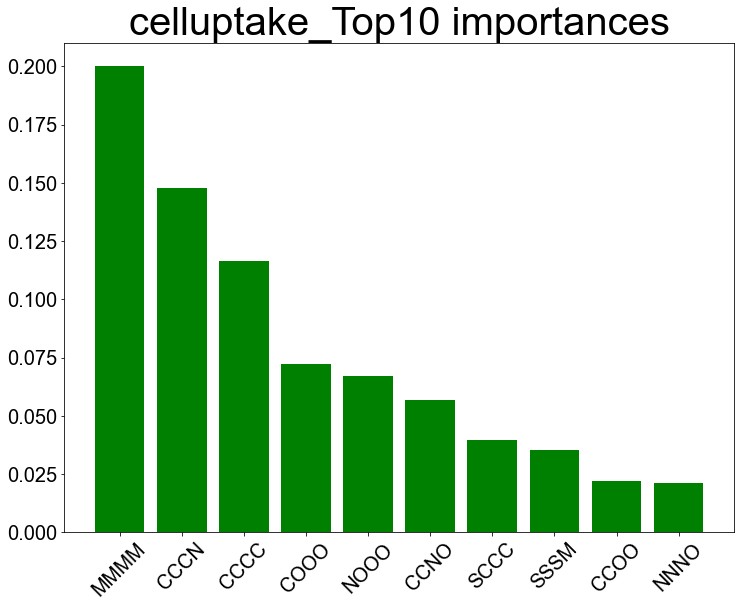

In [8]:
importances = rfc.feature_importances_

plt.figure(figsize=[12,9])
plt.title("celluptake_Top10 importances", fontsize=40)
plt.bar(range(10), np.sort(importances)[::-1][:10],color='green')
importances_index_reverse = np.argsort(importances)[::-1][:10]
plt.xticks(range(10), X.columns[importances_index_reverse],fontsize=20,rotation=45)
plt.yticks(fontsize=20)
plt.savefig('./ct_Top10 importances.png')
plt.show()

In [9]:
pd.DataFrame(np.sort(importances)[::-1][:10],X.columns[importances_index_reverse])

,0
MMMM,0.199952
CCCN,0.147951
CCCC,0.116362
COOO,0.072113
NOOO,0.067037
CCNO,0.056626
SCCC,0.039771
SSSM,0.035357
CCOO,0.021944
NNNO,0.021314


## 预测新数据

In [129]:
generate = pd.read_csv('./generate_out_xa.csv',index_col=0)#.iloc[:,1:]
generate_prediction = regressor.predict(generate)
pd.DataFrame(generate_prediction).to_excel('./logP_pred_gene_RF.xlsx')

## 主成分分析

In [125]:
database = pd.read_csv('./SupplementaryData_AuAgPtPd_xa.csv',index_col=0).iloc[:,1:]
generate = pd.read_csv('./generate_out_xa.csv',index_col=0)#.iloc[:,1:]

pca = PCA(n_components=3,copy=True,random_state=8)

databasePCA = pca.fit_transform(database)
pd.DataFrame(databasePCA).to_excel('./PCA_database.xlsx')
generatePCA = pca.fit_transform(generate)
pd.DataFrame(generatePCA).to_excel('./PCA_generate.xlsx')

********************

# XGBoost

### 预打分

In [13]:
Xtrain,Xtest,Ytrain,Ytest = train_test_split(X,Y,test_size=0.2,random_state=100)
XGB = XGBR(random_state=60)
CV_score = cross_val_score(XGB, Xtrain, Ytrain, cv=5).mean()
regressor = XGB.fit(Xtrain, Ytrain)
score_test = regressor.score(Xtest,Ytest)
print("5cv:",CV_score,"TEST:",score_test)

5cv: 0.3734509090548771 TEST: 0.5271330468131785


### 设置train_test_split的随机数种子，输出CV_score>0.60 and score_test>0.70的打分和random_state值
#### 不运行，已有运行结果

In [16]:
# CV = 0
# test =0
for i in range(500):
    Xtrain,Xtest,Ytrain,Ytest = train_test_split(X,Y,test_size=0.2,random_state=i)
    XGB = XGBR(random_state=60)
    CV_score = cross_val_score(XGB, Xtrain, Ytrain, cv=5).mean()
    regressor = XGB.fit(Xtrain, Ytrain)
    score_test = regressor.score(Xtest,Ytest)
#     if CV < CV_score and test < score_test:
#         CV = CV_score
#         test = score_test
    if CV_score>0.55 and score_test>0.65:
        print("5cv:",CV_score,"TEST:",score_test,"random_state:",i)

5cv: 0.554666826131433 TEST: 0.6610583496147089 random_state: 44
5cv: 0.5583129075259012 TEST: 0.7046428311768824 random_state: 96
5cv: 0.5737443968862401 TEST: 0.7010601783709194 random_state: 113
5cv: 0.5542914670394382 TEST: 0.7091062599176053 random_state: 170
5cv: 0.5687125362990711 TEST: 0.6804019494032374 random_state: 233
5cv: 0.5503091900164163 TEST: 0.6545712190003764 random_state: 264
5cv: 0.5677204332260617 TEST: 0.6772534596597494 random_state: 323
5cv: 0.575766872978557 TEST: 0.6605626153009785 random_state: 328
5cv: 0.5796745948460128 TEST: 0.6763265450238813 random_state: 356


In [17]:
Xtrain,Xtest,Ytrain,Ytest = train_test_split(X,Y,test_size=0.2,random_state=113)

In [18]:
XGB = XGBR(random_state=60)
CV_score = cross_val_score(XGB, Xtrain, Ytrain, cv=5).mean()
regressor = XGB.fit(Xtrain, Ytrain)
score_test = regressor.score(Xtest,Ytest)
print("5cv:",CV_score,"TEST:",score_test)

5cv: 0.5737443968862401 TEST: 0.7010601783709194


### Random_state

In [19]:
score_5cv_all = []
for i in range(0, 200, 1):
    XGB =XGBR(random_state=i)
    score_5cv =cross_val_score(XGB, Xtrain, Ytrain, cv=5).mean()
    score_5cv_all.append(score_5cv)
    pass
score_max_5cv = max(score_5cv_all)
random_state_5cv = range(0, 200)[score_5cv_all.index(max(score_5cv_all))]

print("Best_5cv score：{}".format(score_max_5cv),
      "random_state_5cv:{}".format(random_state_5cv))

Best_5cv score：0.5737443968862401 random_state_5cv:0


### learning_rate

In [20]:
score_5cv_all = []
for i in np.arange(0.01, 0.5, 0.01):
    XGB = XGBR(learning_rate=i
              ,random_state=random_state_5cv)
    score_5cv = cross_val_score(XGB, Xtrain, Ytrain, cv=5).mean()
    score_5cv_all.append(score_5cv)
    pass
score_max_5cv = max(score_5cv_all)
n_lr_5cv = np.arange(0.01,0.5,0.01)[score_5cv_all.index(score_max_5cv)]

print("Best_5cv score：{}".format(score_max_5cv),
      "n_lr_5cv:{}".format(n_lr_5cv))

Best_5cv score：0.6072619364166199 n_lr_5cv:0.38


### N_estimators

In [21]:
score_5cv_all = []
for i in range(1, 400, 1):
    XGB = XGBR(n_estimators=i
               ,learning_rate=n_lr_5cv
               ,random_state=random_state_5cv)
    score_5cv = cross_val_score(XGB, Xtrain, Ytrain, cv=5).mean()
    score_5cv_all.append(score_5cv)
    pass
score_max_5cv = max(score_5cv_all)
n_est_5cv = range(1,400)[score_5cv_all.index(score_max_5cv)]

print("Best_5cv score：{}".format(score_max_5cv),
      "n_est_5cv:{}".format(n_est_5cv))

Best_5cv score：0.6086234833421302 n_est_5cv:8


### Max_depth

In [23]:
score_5cv_all = []
for i in range(1, 300, 1):
    XGB = XGBR(n_estimators=n_est_5cv
               ,learning_rate=n_lr_5cv
               ,random_state=random_state_5cv
               ,max_depth=i)
    score_5cv = cross_val_score(XGB, Xtrain, Ytrain, cv=5).mean()
    score_5cv_all.append(score_5cv)
    pass
score_max_5cv = max(score_5cv_all)
max_depth_5cv = range(1,300)[score_5cv_all.index(score_max_5cv)]

print("Best_5cv score：{}".format(score_max_5cv),
      "max_depth_5cv:{}".format(max_depth_5cv))

Best_5cv score：0.6086234833421302 max_depth_5cv:6


### Gamma

In [24]:
score_5cv_all = []
for i in np.arange(0,5,0.05):
    XGB = XGBR(n_estimators=n_est_5cv
               ,learning_rate=n_lr_5cv
               ,random_state=random_state_5cv
               ,max_depth=max_depth_5cv
               ,gamma=i)
    score_5cv = cross_val_score(XGB, Xtrain, Ytrain, cv=5).mean()
    score_5cv_all.append(score_5cv)
    pass
score_max_5cv = max(score_5cv_all)
max_gamma_5cv =  np.arange(0,5,0.05)[score_5cv_all.index(score_max_5cv)]
print("Best_5cv score：{}".format(score_max_5cv),
      "max_gamma_5cv:{}".format(max_gamma_5cv))

Best_5cv score：0.6086234833421302 max_gamma_5cv:0.0


### Alpha

In [25]:
score_5cv_all = []
for i in np.arange(0,5,0.05):
    XGB = XGBR(n_estimators=n_est_5cv,
               learning_rate=n_lr_5cv
               ,random_state=random_state_5cv
               ,max_depth=max_depth_5cv
               ,gamma=max_gamma_5cv 
               ,alpha=i)
    score_5cv = cross_val_score(XGB, Xtrain, Ytrain, cv=5).mean()
    score_5cv_all.append(score_5cv)
    pass
score_max_5cv = max(score_5cv_all)
max_alpha_5cv =  np.arange(0,5,0.05)[score_5cv_all.index(score_max_5cv)]

print("Best_5cv score：{}".format(score_max_5cv),
      "max_alpha_5cv:{}".format(max_alpha_5cv))

Best_5cv score：0.6133784488756856 max_alpha_5cv:0.05


## 使用调整过后的参数

In [26]:
XGB = XGBR(learning_rate=n_lr_5cv
           ,n_estimators=n_est_5cv
           ,random_state=random_state_5cv
           ,max_depth=max_depth_5cv
           ,gamma =max_gamma_5cv
           ,alpha = max_alpha_5cv)
CV_score = cross_val_score(XGB, Xtrain, Ytrain, cv=5).mean()
CV_predictions = cross_val_predict(XGB, Xtrain, Ytrain, cv=5)
rmse = np.sqrt(mean_squared_error(Ytrain,CV_predictions))
print("r2_5cv:",CV_score,"rmse_5CV",rmse)
# expvspred_5cv = {'Exp': Ytrain, 'Pred':CV_predictions}
# pd.DataFrame(expvspred_5cv).to_excel('./XGB_5fcv_predictions_logP.xlsx')

r2_5cv: 0.6133784488756856 rmse_5CV 1.0185742702797953


In [27]:
XGB = XGBR(learning_rate=n_lr_5cv
           ,n_estimators=n_est_5cv
           ,random_state=random_state_5cv
           ,max_depth=max_depth_5cv
           ,gamma =max_gamma_5cv
           ,alpha = max_alpha_5cv)
regressor = XGB.fit(Xtrain, Ytrain)
test_predictions = regressor.predict(Xtest)
score_test = regressor.score(Xtest,Ytest)
rmse = np.sqrt(mean_squared_error(Ytest,test_predictions))
print("r2_test:",score_test,"rmse_test",rmse)
# expvspred_test = {'Exp':Ytest,'Pred':test_predictions}
# pd.DataFrame(expvspred_test).to_excel('./XGB_test_predictions_logPsx')

r2_test: 0.6955188018478764 rmse_test 0.8804392387711172


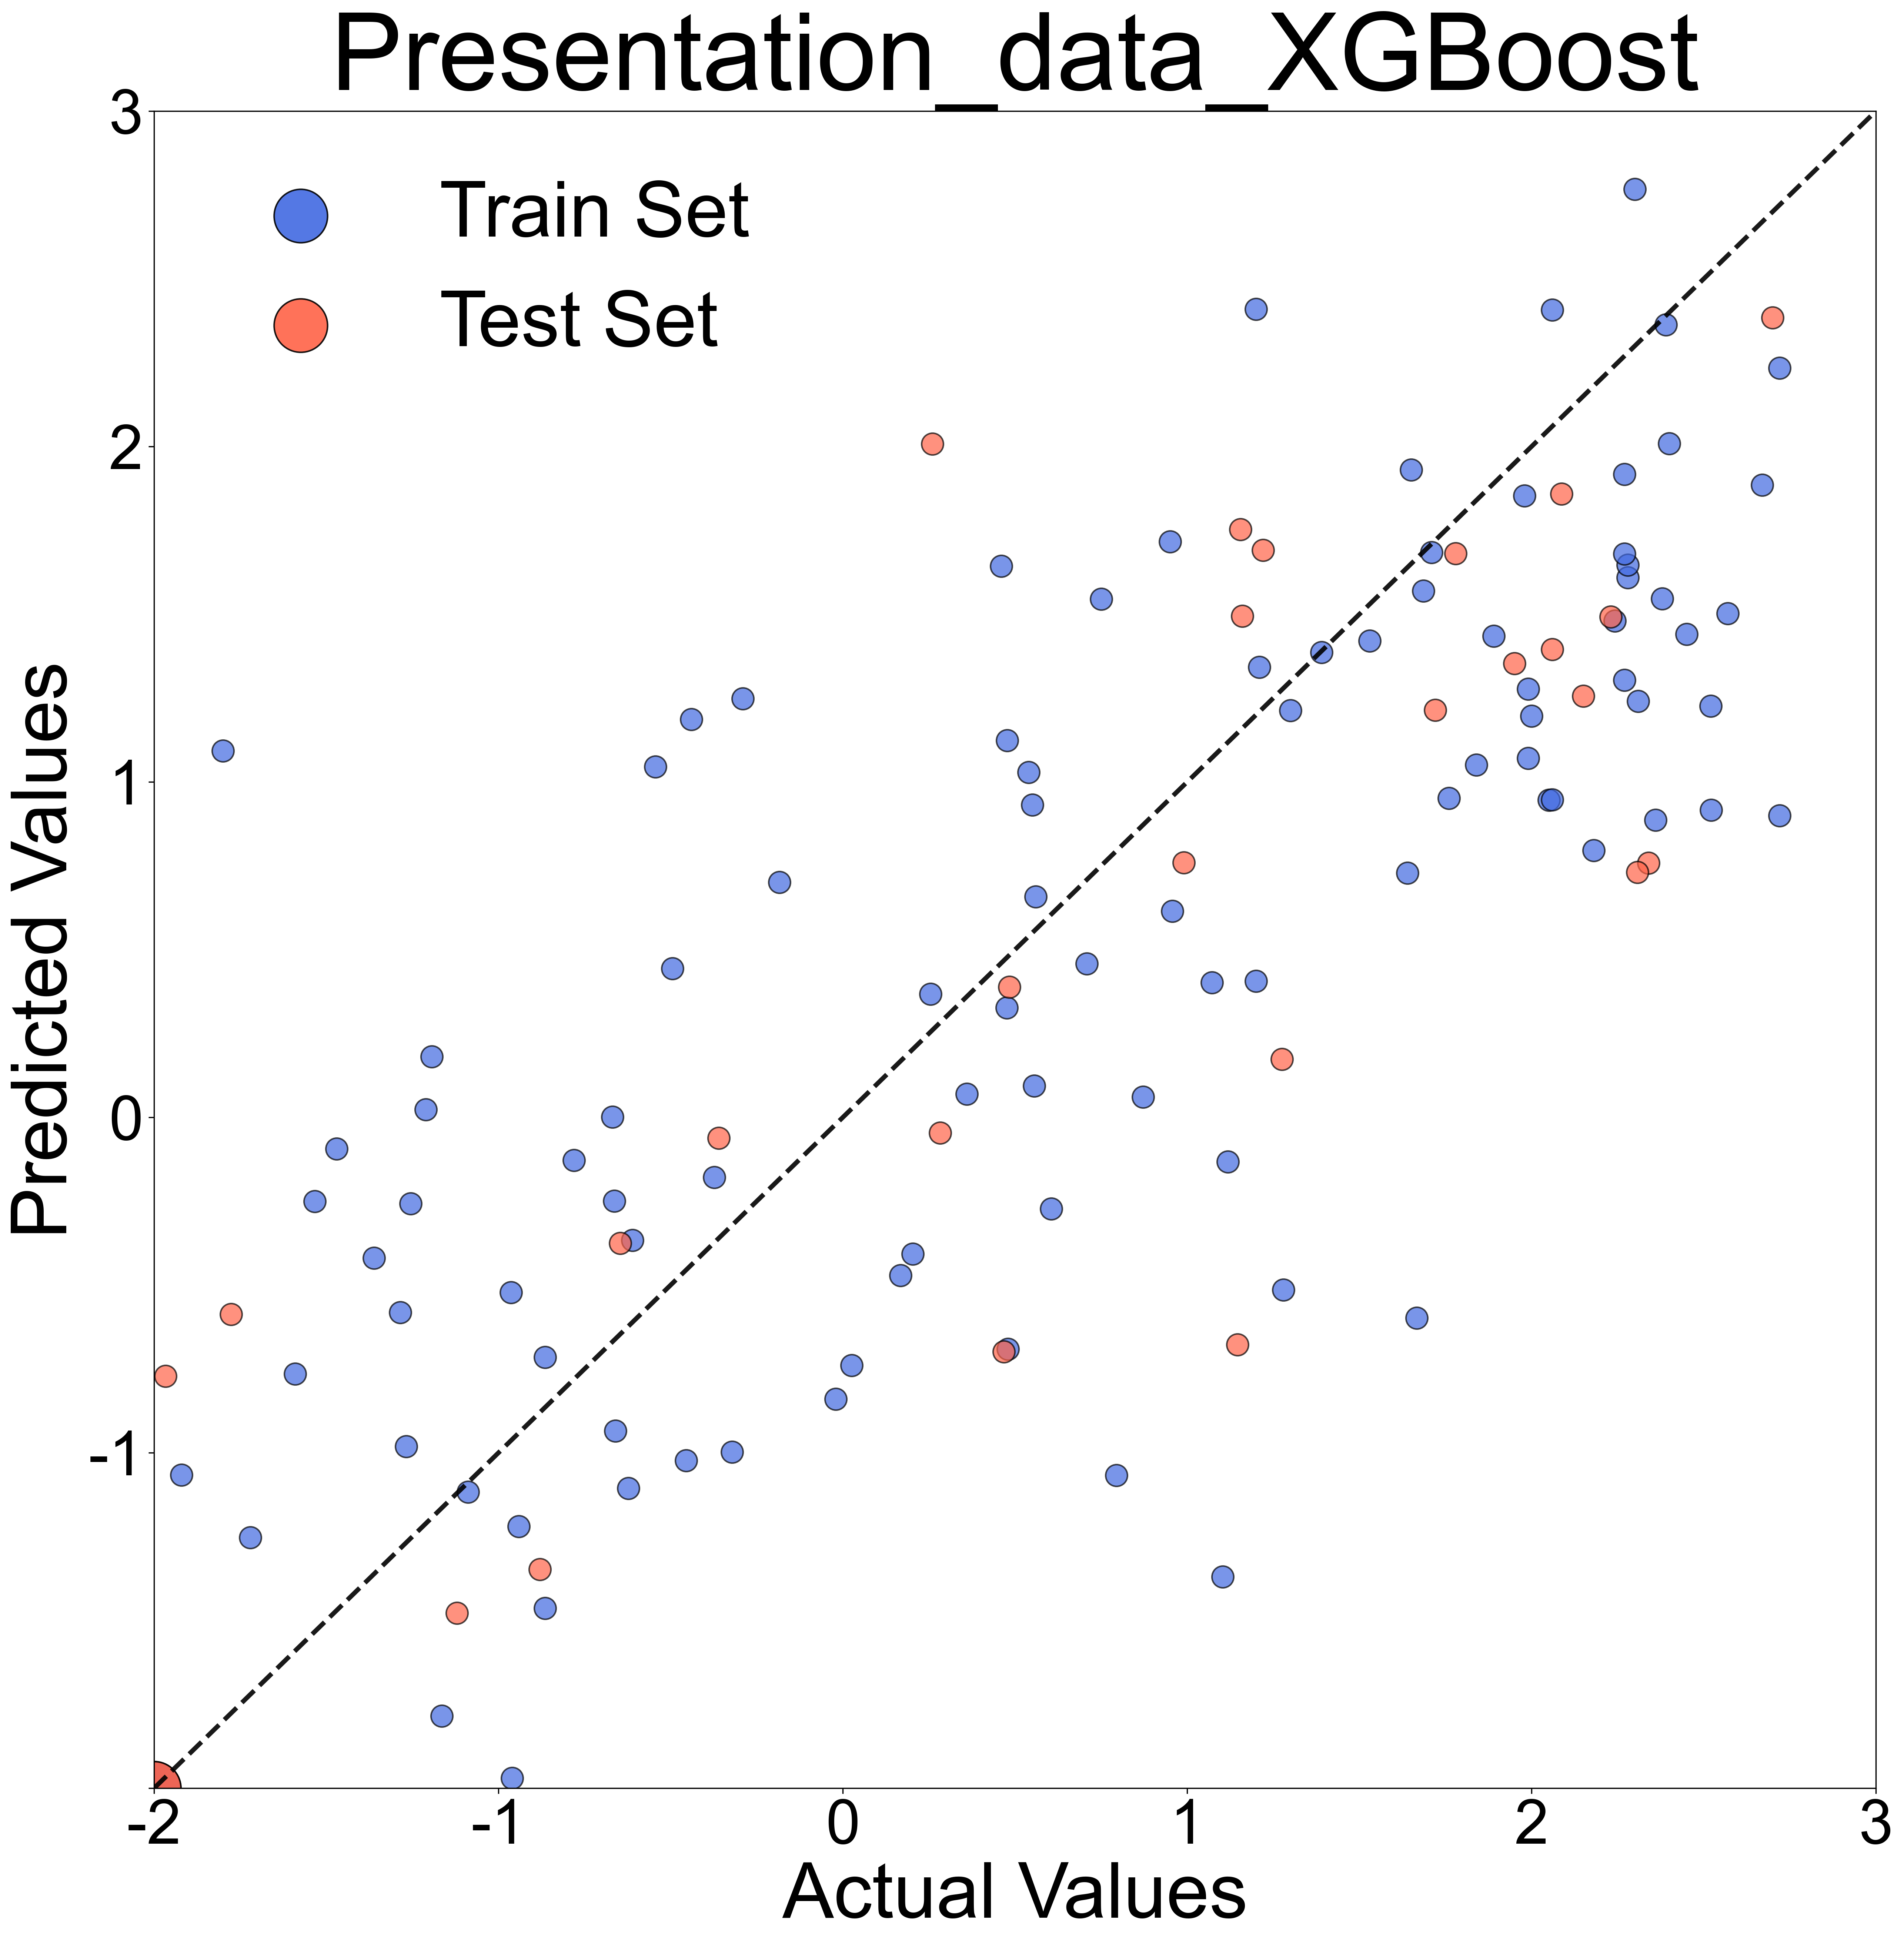

In [46]:
result_figure(Ytrain, CV_predictions, Ytest, test_predictions, "Actual Values", "Predicted Values", "Presentation_data", "XGBoost", "./results_xgb")

# KNN

### 预打分

In [28]:
Xtrain,Xtest,Ytrain,Ytest = train_test_split(X,Y,test_size=0.2,random_state=100)
knr = KNR()# 默认参数，创建空分类器
CV_score = cross_val_score(knr, Xtrain, Ytrain, cv=5).mean()
regressor = knr.fit(Xtrain, Ytrain)
score_test = regressor.score(Xtest,Ytest)
print("5cv:",CV_score,"TEST:",score_test)

5cv: 0.5955252487848126 TEST: 0.6710041829342508


### 设置train_test_split的随机数种子，输出CV_score>0.60 and score_test>0.70的打分和random_state值
#### 不运行，已有运行结果

In [29]:
# CV = 0
# test =0
for i in range(500):
    Xtrain,Xtest,Ytrain,Ytest = train_test_split(X,Y,test_size=0.2,random_state=i)
    knr = KNR()
    CV_score = cross_val_score(knr, Xtrain, Ytrain, cv=5).mean()
    regressor = knr.fit(Xtrain, Ytrain)
    score_test = regressor.score(Xtest,Ytest)
#     if CV < CV_score and test < score_test:
#         CV = CV_score
#         test = score_test
    if CV_score>0.60 and score_test>0.70:
        print("5cv:",CV_score,"TEST:",score_test,"random_state:",i)

5cv: 0.6045963935476039 TEST: 0.7043623306686115 random_state: 50
5cv: 0.6069045006239414 TEST: 0.7330159256746516 random_state: 266
5cv: 0.6068858635109431 TEST: 0.7160557382562929 random_state: 451


In [30]:
Xtrain,Xtest,Ytrain,Ytest = train_test_split(X,Y,test_size=0.2,random_state=266)

In [31]:
knr = KNR()# 默认参数，创建空分类器
CV_score = cross_val_score(knr, Xtrain, Ytrain, cv=5).mean()
regressor = knr.fit(Xtrain, Ytrain)
score_test = regressor.score(Xtest,Ytest)
print("5cv:",CV_score,"TEST:",score_test)

5cv: 0.6069045006239414 TEST: 0.7330159256746516


### 网格搜索

In [32]:
param_grid = [
    {  # 需遍历10次
        'weights': ['uniform'], # 参数取值范围
        'n_neighbors': [i for i in range(1, 11)]  # 使用其他方式如np.arange()也可以
        # 这里没有p参数
    },
    {  # 需遍历50次
        'weights': ['distance'],
        'n_neighbors': [i for i in range(1, 11)],
        'p': [i for i in range(1, 6)]
    }
]# 共需遍历60次

In [33]:
from sklearn.model_selection import GridSearchCV  # CV，使用交叉验证方式获得模型正确率
grid_search = GridSearchCV(knr, param_grid, cv=5)  # 网格搜索参数

grid_search.fit(Xtrain, Ytrain)  # 网格搜索训练模型

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid=[{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                          'weights': ['uniform']},
                         {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                          'p': [1, 2, 3, 4, 5], 'weights': ['distance']}])

In [34]:
grid_search.best_estimator_

KNeighborsRegressor(n_neighbors=3, weights='distance')

In [35]:
grid_search.score(Xtest, Ytest)

0.7254794630150087

In [36]:
knr=grid_search.best_estimator_

CV_score = cross_val_score(knr, Xtrain, Ytrain, cv=5).mean()
CV_predictions = cross_val_predict(knr, Xtrain, Ytrain, cv=5)
rmse_5cv = np.sqrt(mean_squared_error(Ytrain,CV_predictions))
regressor=knr.fit(Xtrain, Ytrain)
score_test = regressor.score(Xtest,Ytest)
test_predictions = regressor.predict(Xtest)
rmse_test = np.sqrt(mean_squared_error(Ytest,test_predictions))

print("5cv:",CV_score,"rmse_5cv:",rmse_5cv)
print("test:",score_test,"rmse_test:",rmse_test)

5cv: 0.6303344889994678 rmse_5cv: 0.9751225651473948
test: 0.7254794630150087 rmse_test: 0.8738950739572445


******

## 用全部的数据做五折

#### logP

In [124]:
# data=pd.read_excel(r'd:\Desktop\task0\predict_model\model2\S12.xlsx',sheet_name='logP').to_numpy()

# X = data[:,3:129]
# y = data[:,2]

#### celluptake1

In [5]:
data=pd.read_excel(r'd:\Desktop\task0\predict_model\model2\S12.xlsx',sheet_name='celluptake1').to_numpy()

X = data[:,3:129]
y = data[:,2]

## RF

In [7]:
for i in range(0,500):
    kf = KFold(n_splits= 5,shuffle=True,random_state=i)

    score_all=[]
    for train_index, test_index in kf.split(X):
        rfr = RandomForestRegressor(random_state=60)
        # train_index 就是分类的训练集的下标，test_index 就是分配的验证集的下标
        train_x, train_y = X[train_index], y[train_index]  # 本组训练集
        test_x, test_y = X[test_index], y[test_index]  # 本组验证集
        prediction = rfr.fit(train_x, train_y).predict(test_x)
        score = r2_score(test_y, prediction)
        score_all.append(score)

    score_mean = np.mean(score_all)
    if score_mean > 0.70:
        print('r2_score:',score_mean,"random_state:",i)

r2_score: 0.7013696108100448 random_state: 18
r2_score: 0.7272432053269423 random_state: 22
r2_score: 0.7056818299386638 random_state: 87
r2_score: 0.7076052767313834 random_state: 89
r2_score: 0.7544631330818938 random_state: 100
r2_score: 0.7057012429490712 random_state: 109
r2_score: 0.7169074150415178 random_state: 122
r2_score: 0.70140886595055 random_state: 145
r2_score: 0.7045125423303604 random_state: 152
r2_score: 0.7056523222019002 random_state: 182
r2_score: 0.7183314681104068 random_state: 190
r2_score: 0.7344757481091746 random_state: 208
r2_score: 0.7390159902028816 random_state: 209
r2_score: 0.7029044152776425 random_state: 217
r2_score: 0.7031937477766812 random_state: 221
r2_score: 0.7053905034841763 random_state: 223
r2_score: 0.730279233756306 random_state: 232
r2_score: 0.7254303745089695 random_state: 291
r2_score: 0.7400317655178725 random_state: 323
r2_score: 0.7014245647224207 random_state: 348
r2_score: 0.7061641254235212 random_state: 361
r2_score: 0.70122252

In [8]:
kf = KFold(n_splits= 5,shuffle=True,random_state=100)

score_all=[]
for train_index, test_index in kf.split(X):
    rfr = RandomForestRegressor(random_state=60)
    train_x, train_y = X[train_index], y[train_index]
    test_x, test_y = X[test_index], y[test_index]
    prediction = rfr.fit(train_x, train_y).predict(test_x)
    score = r2_score(test_y, prediction)
    score_all.append(score)

score_mean = np.mean(score_all)
print('r2_score:',score_mean)

r2_score: 0.7544631330818938


### random_state

In [9]:
score_5cv_all = []
for i in range(0, 200, 1):
    score_all=[]
    for train_index, test_index in kf.split(X):
        rfr =RandomForestRegressor(random_state=i)
        train_x, train_y = X[train_index], y[train_index]
        test_x, test_y = X[test_index], y[test_index]
        prediction = rfr.fit(train_x, train_y).predict(test_x)
        score = r2_score(test_y, prediction)
        score_all.append(score)
        
    score_mean = np.mean(score_all)
    score_5cv_all.append(score_mean)
    
score_max_5cv = max(score_5cv_all)
random_state_5cv = range(0, 200)[score_5cv_all.index(max(score_5cv_all))]

print("Best_5cv score：{}".format(score_max_5cv),
      "random_5cv:{}".format(random_state_5cv))

Best_5cv score：0.7884773788035546 random_5cv:99


### n_estimators

In [10]:
score_5cv_all = []
for i in range(1, 400, 1):
    score_all=[]
    for train_index, test_index in kf.split(X):
        rfr = RandomForestRegressor(n_estimators=i
                                   ,random_state=random_state_5cv)
        train_x, train_y = X[train_index], y[train_index]
        test_x, test_y = X[test_index], y[test_index]
        prediction = rfr.fit(train_x, train_y).predict(test_x)
        score = r2_score(test_y, prediction)
        score_all.append(score)
        
    score_mean = np.mean(score_all)
    score_5cv_all.append(score_mean)
    
score_max_5cv = max(score_5cv_all)
n_est_5cv = range(1,400)[score_5cv_all.index(score_max_5cv)]

print("Best_5cv score：{}".format(score_max_5cv),
      "n_est_5cv:{}".format(n_est_5cv))

Best_5cv score：0.8049147288931525 n_est_5cv:21


### max_depth

In [11]:
score_5cv_all = []
for i in range(1, 300, 1):
    score_all=[]
    for train_index, test_index in kf.split(X):
        rfr = RandomForestRegressor(n_estimators=n_est_5cv
                                ,random_state=random_state_5cv
                                ,max_depth=i)
        train_x, train_y = X[train_index], y[train_index]
        test_x, test_y = X[test_index], y[test_index]
        prediction = rfr.fit(train_x, train_y).predict(test_x)
        score = r2_score(test_y, prediction)
        score_all.append(score)
        
    score_mean = np.mean(score_all)
    score_5cv_all.append(score_mean)
    
score_max_5cv = max(score_5cv_all)
max_depth_5cv = range(1,300)[score_5cv_all.index(score_max_5cv)]

print("Best_5cv score：{}".format(score_max_5cv),
      "max_depth_5cv:{}".format(max_depth_5cv))

Best_5cv score：0.8128664829215946 max_depth_5cv:11


### max_features

In [12]:
score_5cv_all = []
for i in range(int(X.shape[1]**0.1)+1, X.shape[1]):
    score_all=[]
    for train_index, test_index in kf.split(X):
        rfr = RandomForestRegressor(n_estimators=n_est_5cv
                                ,random_state=random_state_5cv
                                ,max_depth=max_depth_5cv
                                ,max_features=i)
        train_x, train_y = X[train_index], y[train_index]
        test_x, test_y = X[test_index], y[test_index]
        prediction = rfr.fit(train_x, train_y).predict(test_x)
        score = r2_score(test_y, prediction)
        score_all.append(score)
        
    score_mean = np.mean(score_all)
    score_5cv_all.append(score_mean)
    
score_max_5cv = max(score_5cv_all)
max_features_5cv = range(int(X.shape[1]**0.1)+1, X.shape[1])[score_5cv_all.index(score_max_5cv)]

print("Best_5cv score：{}".format(score_max_5cv),
      "max_features_5cv:{}".format(max_features_5cv))

Best_5cv score：0.814072575258573 max_features_5cv:81


### 使用调整过后的参数

In [13]:
kf = KFold(n_splits= 5,shuffle=True,random_state=100)

score_all=[]
score_all=[]
for train_index, test_index in kf.split(X):
    rfr = RandomForestRegressor(n_estimators=n_est_5cv
                            ,random_state=random_state_5cv
                            ,max_depth=max_depth_5cv
                            ,max_features=max_features_5cv)
    train_x, train_y = X[train_index], y[train_index]
    test_x, test_y = X[test_index], y[test_index]
    regressor = rfr.fit(train_x, train_y)
    prediction = regressor.predict(test_x)
    score = r2_score(test_y, prediction)
    score_all.append(score)
        
score_mean = np.mean(score_all)
print('r2_score:',score_mean)

r2_score: 0.814072575258573


In [140]:
# generate = pd.read_csv('./generate.csv',index_col=0)
# generate_prediction = regressor.predict(generate.values)
# generate_prediction

array([-1.11300241, -1.06609157, -0.79124819, -0.68340602, -1.05402169,
       -0.78399277, -0.66187349, -1.11621928, -1.09837831, -0.80435422,
       -1.18415663, -1.53741928, -1.30881446,  0.74788193,  0.83756265,
        0.88041205,  0.82220843, -0.53015542,  0.87068916, -1.66038072,
       -0.24830602,  0.52509157, -0.45150602,  0.69130482, -0.67701566,
       -0.60728675, -0.45311205, -1.51768072, -0.52520361, -0.38561687,
        0.16480361, -1.48874578, -0.19440516, -0.14256902, -0.05438107,
       -0.03984854,  1.01182795,  1.00726627,  1.05242651,  0.22721687,
        0.93622169,  0.87736145, -1.57749277, -1.58866386, -2.02232289,
       -0.05246747, -2.09780964, -1.26643253,  0.31757831,  0.45849398,
        0.5682012 ])

********

## XGB

In [14]:
for i in range(0,500):
    kf = KFold(n_splits= 5,shuffle=True,random_state=i)

    score_all=[]
    for train_index, test_index in kf.split(X):
        XGB = XGBR(random_state=60)
        # train_index 就是分类的训练集的下标，test_index 就是分配的验证集的下标
        train_x, train_y = X[train_index], y[train_index]  # 本组训练集
        test_x, test_y = X[test_index], y[test_index]  # 本组验证集
        prediction = XGB.fit(train_x, train_y).predict(test_x)
        score = r2_score(test_y, prediction)
        score_all.append(score)

    score_mean = np.mean(score_all)
    if score_mean > 0.70:
        print('r2_score:',score_mean,"random_state:",i)

r2_score: 0.7203339805366271 random_state: 100
r2_score: 0.7077918364855778 random_state: 145
r2_score: 0.7440124395130135 random_state: 323
r2_score: 0.7527588232694911 random_state: 407
r2_score: 0.7084771165235552 random_state: 473


In [18]:
kf = KFold(n_splits= 5,shuffle=True,random_state=407)

score_all=[]
for train_index, test_index in kf.split(X):
    XGB = XGBR(random_state=60)
    train_x, train_y = X[train_index], y[train_index]
    test_x, test_y = X[test_index], y[test_index]
    prediction = XGB.fit(train_x, train_y).predict(test_x)
    score = r2_score(test_y, prediction)
    score_all.append(score)

score_mean = np.mean(score_all)
print('r2_score:',score_mean)

r2_score: 0.7527588232694911


### random_state

In [19]:
score_5cv_all = []
for i in range(0, 200, 1):
    score_all=[]
    for train_index, test_index in kf.split(X):
        XGB = XGBR(random_state=i)
        train_x, train_y = X[train_index], y[train_index]
        test_x, test_y = X[test_index], y[test_index]
        prediction = XGB.fit(train_x, train_y).predict(test_x)
        score = r2_score(test_y, prediction)
        score_all.append(score)
        
    score_mean = np.mean(score_all)
    score_5cv_all.append(score_mean)
    
score_max_5cv = max(score_5cv_all)
random_state_5cv = range(0, 200)[score_5cv_all.index(max(score_5cv_all))]

print("Best_5cv score：{}".format(score_max_5cv),
      "random_5cv:{}".format(random_state_5cv))

Best_5cv score：0.7527588232694911 random_5cv:0


### learning_rate

In [20]:
score_5cv_all = []
for i in np.arange(0.01, 0.5, 0.01):
    score_all=[]
    for train_index, test_index in kf.split(X):
        XGB = XGBR(learning_rate=i
              ,random_state=random_state_5cv)
        train_x, train_y = X[train_index], y[train_index]
        test_x, test_y = X[test_index], y[test_index]
        prediction = XGB.fit(train_x, train_y).predict(test_x)
        score = r2_score(test_y, prediction)
        score_all.append(score)
        
    score_mean = np.mean(score_all)
    score_5cv_all.append(score_mean)
    
score_max_5cv = max(score_5cv_all)
n_lr_5cv = np.arange(0.01,0.5,0.01)[score_5cv_all.index(score_max_5cv)]

print("Best_5cv score：{}".format(score_max_5cv),
      "n_lr_5cv:{}".format(n_lr_5cv))

Best_5cv score：0.758129801285443 n_lr_5cv:0.24000000000000002


### n_estimators

In [21]:
score_5cv_all = []
for i in range(1, 400, 1):
    score_all=[]
    for train_index, test_index in kf.split(X):
        XGB = XGBR(n_estimators=i
               ,learning_rate=n_lr_5cv
               ,random_state=random_state_5cv)
        train_x, train_y = X[train_index], y[train_index]
        test_x, test_y = X[test_index], y[test_index]
        prediction = XGB.fit(train_x, train_y).predict(test_x)
        score = r2_score(test_y, prediction)
        score_all.append(score)
        
    score_mean = np.mean(score_all)
    score_5cv_all.append(score_mean)
    
score_max_5cv = max(score_5cv_all)
n_est_5cv = range(1,400)[score_5cv_all.index(score_max_5cv)]

print("Best_5cv score：{}".format(score_max_5cv),
      "n_est_5cv:{}".format(n_est_5cv))

Best_5cv score：0.7614200130665931 n_est_5cv:16


### max_depth

In [22]:
score_5cv_all = []
for i in range(1, 300, 1):
    score_all=[]
    for train_index, test_index in kf.split(X):
        XGB = XGBR(n_estimators=n_est_5cv
               ,learning_rate=n_lr_5cv
               ,random_state=random_state_5cv
               ,max_depth=i)
        train_x, train_y = X[train_index], y[train_index]
        test_x, test_y = X[test_index], y[test_index]
        prediction = XGB.fit(train_x, train_y).predict(test_x)
        score = r2_score(test_y, prediction)
        score_all.append(score)
        
    score_mean = np.mean(score_all)
    score_5cv_all.append(score_mean)
    
score_max_5cv = max(score_5cv_all)
max_depth_5cv = range(1,300)[score_5cv_all.index(score_max_5cv)]

print("Best_5cv score：{}".format(score_max_5cv),
      "max_depth_5cv:{}".format(max_depth_5cv))

Best_5cv score：0.7614200130665931 max_depth_5cv:6


### gamma

In [23]:
score_5cv_all = []
for i in np.arange(0,5,0.05):
    score_all=[]
    for train_index, test_index in kf.split(X):
        XGB = XGBR(n_estimators=n_est_5cv
               ,learning_rate=n_lr_5cv
               ,random_state=random_state_5cv
               ,max_depth=max_depth_5cv
               ,gamma=i)
        train_x, train_y = X[train_index], y[train_index]
        test_x, test_y = X[test_index], y[test_index]
        prediction = XGB.fit(train_x, train_y).predict(test_x)
        score = r2_score(test_y, prediction)
        score_all.append(score)
        
    score_mean = np.mean(score_all)
    score_5cv_all.append(score_mean)
    
score_max_5cv = max(score_5cv_all)
max_gamma_5cv =  np.arange(0,5,0.05)[score_5cv_all.index(score_max_5cv)]

print("Best_5cv score：{}".format(score_max_5cv),
      "max_gamma_5cv:{}".format(max_gamma_5cv))

Best_5cv score：0.7624426296792107 max_gamma_5cv:0.05


### alpha

In [24]:
score_5cv_all = []
for i in np.arange(0,5,0.05):
    score_all=[]
    for train_index, test_index in kf.split(X):
        XGB = XGBR(n_estimators=n_est_5cv,
               learning_rate=n_lr_5cv
               ,random_state=random_state_5cv
               ,max_depth=max_depth_5cv
               ,gamma=max_gamma_5cv 
               ,alpha=i
                  )
        train_x, train_y = X[train_index], y[train_index]
        test_x, test_y = X[test_index], y[test_index]
        prediction = XGB.fit(train_x, train_y).predict(test_x)
        score = r2_score(test_y, prediction)
        score_all.append(score)
        
    score_mean = np.mean(score_all)
    score_5cv_all.append(score_mean)
    
score_max_5cv = max(score_5cv_all)
max_alpha_5cv =  np.arange(0,5,0.05)[score_5cv_all.index(score_max_5cv)]

print("Best_5cv score：{}".format(score_max_5cv),
      "max_alpha_5cv:{}".format(max_alpha_5cv))

Best_5cv score：0.7962941646478089 max_alpha_5cv:2.6500000000000004


### 使用调整过后的参数

In [26]:
kf = KFold(n_splits= 5,shuffle=True,random_state=407)

score_all=[]
for train_index, test_index in kf.split(X):
    XGB = XGBR(n_estimators=n_est_5cv,
           learning_rate=n_lr_5cv
           ,random_state=random_state_5cv
           ,max_depth=max_depth_5cv
           ,gamma=max_gamma_5cv 
           ,alpha=max_alpha_5cv
              )
    train_x, train_y = X[train_index], y[train_index]
    test_x, test_y = X[test_index], y[test_index]
    regressor = XGB.fit(train_x, train_y)
    prediction = regressor.predict(test_x)
    score = r2_score(test_y, prediction)
    score_all.append(score)

score_mean = np.mean(score_all)
print('r2_score:',score_mean)

r2_score: 0.7962941646478089


In [149]:
# generate_prediction = regressor.predict(generate.values)
# generate_prediction

array([-1.11300241, -1.06609157, -0.79124819, -0.68340602, -1.05402169,
       -0.78399277, -0.66187349, -1.11621928, -1.09837831, -0.80435422,
       -1.18415663, -1.53741928, -1.30881446,  0.74788193,  0.83756265,
        0.88041205,  0.82220843, -0.53015542,  0.87068916, -1.66038072,
       -0.24830602,  0.52509157, -0.45150602,  0.69130482, -0.67701566,
       -0.60728675, -0.45311205, -1.51768072, -0.52520361, -0.38561687,
        0.16480361, -1.48874578, -0.19440516, -0.14256902, -0.05438107,
       -0.03984854,  1.01182795,  1.00726627,  1.05242651,  0.22721687,
        0.93622169,  0.87736145, -1.57749277, -1.58866386, -2.02232289,
       -0.05246747, -2.09780964, -1.26643253,  0.31757831,  0.45849398,
        0.5682012 ])

*********

## KNN

In [17]:
for i in range(0,500):
    kf = KFold(n_splits= 5,shuffle=True,random_state=i)

    score_all=[]
    for train_index, test_index in kf.split(X):
        knr = KNR()
        # train_index 就是分类的训练集的下标，test_index 就是分配的验证集的下标
        train_x, train_y = X[train_index], y[train_index]  # 本组训练集
        test_x, test_y = X[test_index], y[test_index]  # 本组验证集
        prediction = knr.fit(train_x, train_y).predict(test_x)
        score = r2_score(test_y, prediction)
        score_all.append(score)

    score_mean = np.mean(score_all)
    if score_mean > 0.75:
        print('r2_score:',score_mean,"random_state:",i)

r2_score: 0.7541726617447083 random_state: 100
r2_score: 0.7507176119152238 random_state: 224
r2_score: 0.7540546814604686 random_state: 337


In [27]:
kf = KFold(n_splits= 5,shuffle=True,random_state=100)

score_all=[]
for train_index, test_index in kf.split(X):
    knr = KNR()
    train_x, train_y = X[train_index], y[train_index]
    test_x, test_y = X[test_index], y[test_index]
    prediction = knr.fit(train_x, train_y).predict(test_x)
    score = r2_score(test_y, prediction)
    score_all.append(score)

score_mean = np.mean(score_all)
print('r2_score:',score_mean)

r2_score: 0.7541726617447083


In [28]:
score_5cv_all = []
for i in range(1, 11):
    score_all=[]
    for train_index, test_index in kf.split(X):
        knr = KNR(weights='uniform'
                 ,n_neighbors=i)
        train_x, train_y = X[train_index], y[train_index]
        test_x, test_y = X[test_index], y[test_index]
        prediction = knr.fit(train_x, train_y).predict(test_x)
        score = r2_score(test_y, prediction)
        score_all.append(score)
        
    score_mean = np.mean(score_all)
    score_5cv_all.append(score_mean)
    
score_max_5cv = max(score_5cv_all)
max_n_neighbors =  range(1, 11)[score_5cv_all.index(score_max_5cv)]

print("Best_5cv score：{}".format(score_max_5cv),
      "max_n_neighbors:{}".format(max_n_neighbors))

Best_5cv score：0.8470541683029881 max_n_neighbors:1


In [29]:
score_5cv_all = []
for i in range(1, 11):
    score_all=[]
    for train_index, test_index in kf.split(X):
        knr = KNR(weights='distance'
                 ,n_neighbors=i)
        train_x, train_y = X[train_index], y[train_index]
        test_x, test_y = X[test_index], y[test_index]
        prediction = knr.fit(train_x, train_y).predict(test_x)
        score = r2_score(test_y, prediction)
        score_all.append(score)
        
    score_mean = np.mean(score_all)
    score_5cv_all.append(score_mean)
    
score_max_5cv = max(score_5cv_all)
max_n_neighbors =  range(1, 11)[score_5cv_all.index(score_max_5cv)]

print("Best_5cv score：{}".format(score_max_5cv),
      "max_n_neighbors:{}".format(max_n_neighbors))

Best_5cv score：0.8470541683029881 max_n_neighbors:1


In [32]:
score_5cv_all = []
for i in range(1, 6):
    score_all=[]
    for train_index, test_index in kf.split(X):
        knr = KNR(weights='distance'
                 ,n_neighbors=1
                 ,p=i)
        train_x, train_y = X[train_index], y[train_index]
        test_x, test_y = X[test_index], y[test_index]
        prediction = knr.fit(train_x, train_y).predict(test_x)
        score = r2_score(test_y, prediction)
        score_all.append(score)
        
    score_mean = np.mean(score_all)
    score_5cv_all.append(score_mean)
    
score_max_5cv = max(score_5cv_all)
max_p =  range(1, 6)[score_5cv_all.index(score_max_5cv)]

print("Best_5cv score：{}".format(score_max_5cv),
      "max_p:{}".format(max_p))

Best_5cv score：0.8470541683029881 max_p:2


### 使用调整过后的参数

In [33]:
score_all=[]
for train_index, test_index in kf.split(X):
    knr = KNR(weights='distance'
                 ,n_neighbors=1
                 ,p=2)
    train_x, train_y = X[train_index], y[train_index]
    test_x, test_y = X[test_index], y[test_index]
    regressor = knr.fit(train_x, train_y)
    prediction = regressor.predict(test_x)
    score = r2_score(test_y, prediction)
    score_all.append(score)

score_mean = np.mean(score_all)
print('r2_score:',score_mean)

r2_score: 0.8470541683029881


In [159]:
# generate_prediction = regressor.predict(generate.values)
# generate_prediction

array([-0.9233453 , -0.69252388, -0.49418245, -0.47390125, -0.50500505,
       -0.51561172, -0.51837528, -0.81659367, -0.9759947 , -0.51487355,
       -0.97805427, -2.52046362, -0.98990677,  0.70174275,  1.13617473,
        1.48251938,  0.96357984, -0.85428786,  1.38547589, -0.31664396,
        2.13608508,  2.291998  ,  1.28976657,  2.18007614, -0.66493836,
       -0.67491758, -0.77255612, -0.51903756, -0.1960158 ,  0.02344861,
        0.36365383, -0.51300209,  1.70553954,  1.69905851,  1.69241807,
        1.6949614 ,  1.49019526,  0.98387639,  1.30901093,  1.02644772,
        1.64705617,  1.4988613 , -0.52353884, -2.52415835, -2.48833252,
       -0.94530886, -2.47419624, -1.07191383,  2.26455311, -1.18606532,
        0.56652211])